In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train = np.array(train)
m, n = train.shape
print(train.shape)
np.random.shuffle(train) 

(42000, 785)


In [9]:
train_dev = train[0:1000].T

In [11]:
print(train_dev.shape)

(785, 1000)


In [12]:
Y_dev = train_dev[0]

In [13]:
X_dev = train_dev[1:n]
X_dev = X_dev / 255.
print(X_dev)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
train_data = train[1000:m].T 
Y_train = train_data[0] 
X_train = train_data[1:n] 
X_train = X_train / 255.


_,m_train = X_train.shape
print(X_train.shape)
print(m_train)


(784, 41000)
41000


In [16]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [17]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [18]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [19]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [20]:
def ReLU_deriv(Z):
    return Z > 0


In [21]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y 


In [22]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [23]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [26]:
def get_predictions(A2):
    return np.argmax(A2, 0) 


In [27]:
def get_accuracy(predictions, Y):
    print(f"prediction: {predictions}, Desired Output: {Y}")
    return np.sum(predictions == Y) / Y.size


In [28]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Accuracy: {round(accuracy, 4)}") 
            print("-----------------------------------------")
    return W1, b1, W2, b2


In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [34]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Predction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Iteration:  0
prediction: [3 4 3 ... 3 1 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.077
-----------------------------------------
Iteration:  10
prediction: [7 5 2 ... 3 1 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.0959
-----------------------------------------
Iteration:  20
prediction: [7 5 2 ... 3 1 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.1561
-----------------------------------------
Iteration:  30
prediction: [7 5 2 ... 7 1 7], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.2189
-----------------------------------------
Iteration:  40
prediction: [7 5 3 ... 7 1 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.2728
-----------------------------------------
Iteration:  50
prediction: [7 3 3 ... 7 6 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.335
-----------------------------------------
Iteration:  60
prediction: [7 3 0 ... 7 6 3], Desired Output: [6 0 0 ... 7 6 2]
Accuracy: 0.3977
-----------------------------------------
Iteration:  70
prediction: [7 

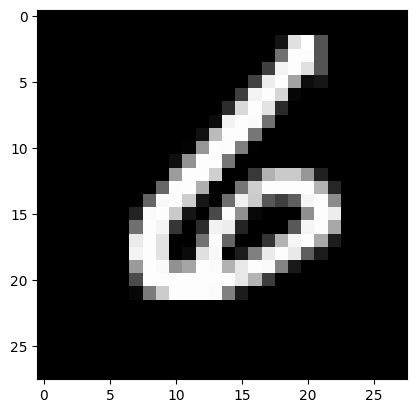

Predction:  [0]
Label:  0


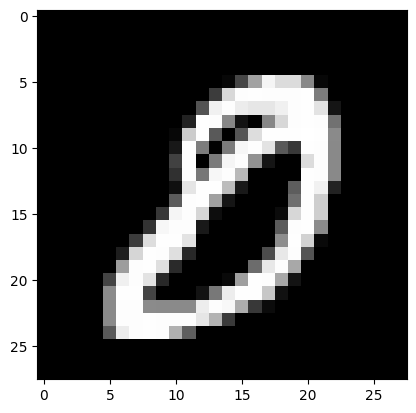

Predction:  [0]
Label:  0


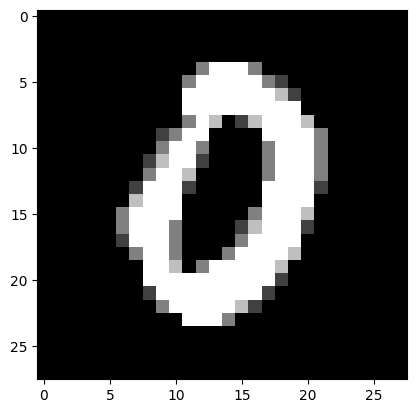

Predction:  [8]
Label:  8


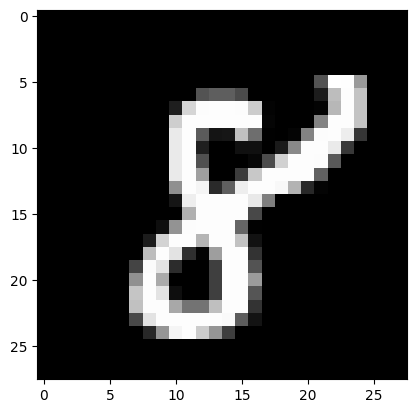

Predction:  [6]
Label:  6


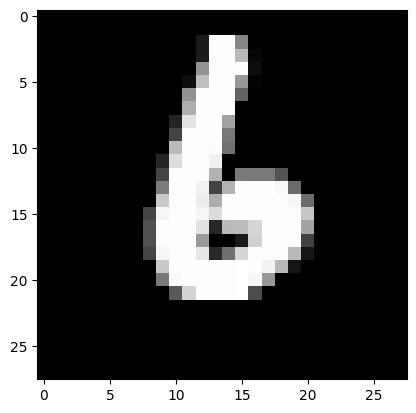

Predction:  [9]
Label:  9


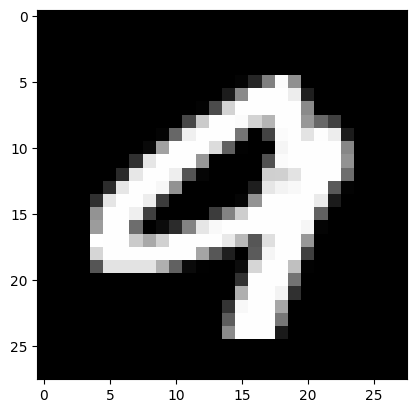

Predction:  [6]
Label:  6


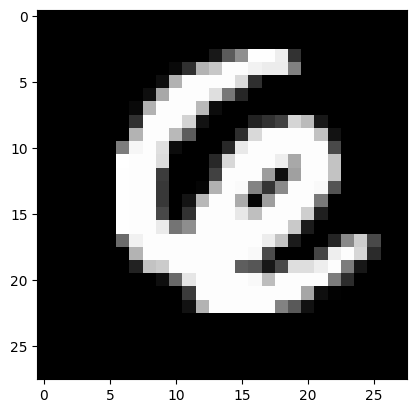

Predction:  [1]
Label:  1


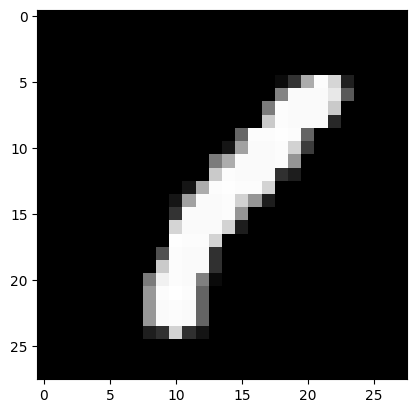

Predction:  [1]
Label:  1


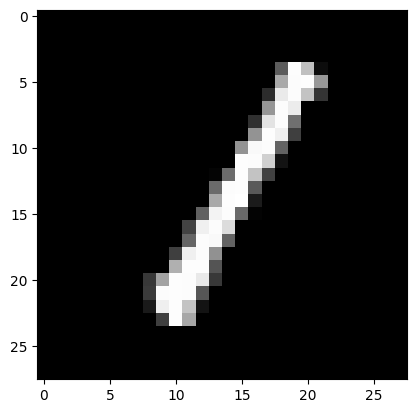

Predction:  [1]
Label:  1


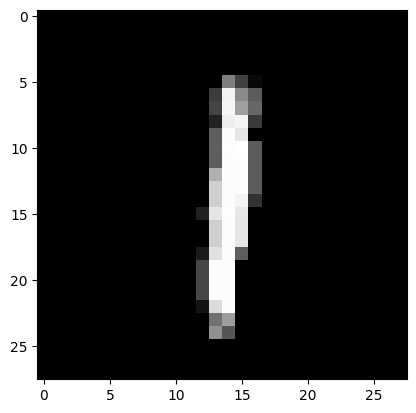

Predction:  [4]
Label:  4


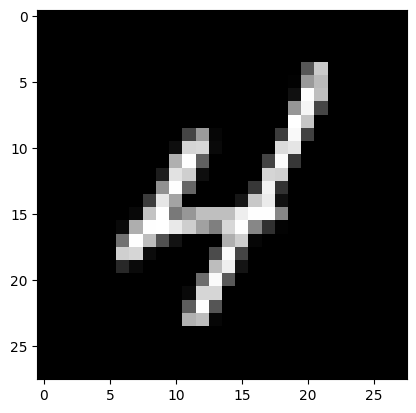

In [38]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500) 
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(54, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(200, W1, b1, W2, b2)


In [40]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
accuracy = get_accuracy(dev_predictions, Y_dev)
print(f"Accuracy on the testing set: {accuracy}")

prediction: [8 9 2 4 8 6 0 0 8 0 1 9 2 7 1 9 7 7 8 8 4 1 4 5 2 5 8 9 7 5 4 4 0 2 0 7 1
 8 9 8 3 2 4 3 5 8 8 2 1 7 9 2 3 7 0 0 8 1 2 3 9 9 0 9 2 0 2 7 9 7 3 7 0 0
 0 5 4 4 8 3 8 4 4 8 9 8 9 6 4 8 7 2 7 0 0 4 4 2 7 6 9 0 7 0 6 7 1 1 2 0 0
 8 4 7 1 2 4 9 2 3 2 6 9 9 4 3 0 4 8 7 6 8 8 4 7 4 0 1 8 6 2 6 2 1 7 6 3 4
 6 0 2 7 7 1 7 8 2 2 5 6 5 1 9 2 2 0 8 9 3 6 3 4 5 6 2 6 4 4 9 4 0 6 1 2 3
 5 0 4 6 4 3 7 3 7 3 7 9 3 8 8 1 7 7 8 7 6 5 6 1 7 0 0 4 3 9 5 6 9 0 9 3 9
 0 6 1 2 1 0 6 4 9 6 9 7 1 2 8 6 6 5 5 4 3 1 5 5 9 5 4 7 9 9 9 0 0 3 4 7 4
 8 7 3 7 1 2 1 6 7 5 6 2 6 7 6 5 3 3 9 0 9 9 8 5 7 7 9 5 4 7 3 0 0 6 5 1 2
 9 7 6 7 0 3 7 2 2 2 1 6 7 1 7 9 4 6 8 3 2 1 1 3 3 1 7 6 3 7 8 9 3 8 5 5 9
 7 6 8 0 1 6 3 3 6 9 0 3 4 2 1 0 0 1 6 1 4 2 9 4 2 3 3 4 2 8 3 6 9 0 8 8 9
 6 7 2 5 6 7 6 3 8 0 2 9 9 4 8 2 3 7 9 7 8 1 6 6 9 5 4 0 3 2 2 1 8 8 6 7 4
 5 1 6 7 5 4 9 2 4 8 1 0 5 3 0 3 6 2 9 5 5 1 6 4 3 0 4 7 6 9 0 5 8 1 0 3 0
 1 7 3 4 2 4 3 9 2 0 2 0 0 0 5 8 2 5 6 5 0 3 1 8 3 6 8 4 8 8 2 5 6 6 7 0 0
 6 7 8 1 2 6 